In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
energs = ["E_%i"%i for i in range(0,200)]
pixels = ["img_%i"%i for i in range(0,1600)]
nn = 280
qn_c = []
tn_c = []
qn_s = []
tn_s = []
qm = []
tm = []

begin = 800000 + 260000

for i in range(nn):
    data = pd.read_hdf("h5files/val.h5",key="table",start=i*1000,stop=(i+1)*1000)
    qcd = data.loc[data.is_signal_new == 0]
    top = data.loc[data.is_signal_new == 1]
    #qcd = pd.read_hdf("../samples_for_gregor/heavy-higgs-final-constit-bg.h5",key="table",start=begin+i*500,stop=begin+(i+1)*500)
    #top = pd.read_hdf("../samples_for_gregor/heavy-higgs-final-constit-sig.h5",key="table",start=i*500,stop=(i+1)*500)
    qn_c += list(np.sum(np.array(qcd[energs])!=0.,axis=1))
    tn_c += list(np.sum(np.array(top[energs])!=0.,axis=1))

    data = pd.read_hdf("h5files/tops-vs-qcd-img40-shih-mass-val.h5",key="table",start=i*1000,stop=(i+1)*1000)
    #data = pd.read_hdf("../samples_for_gregor/heavy-higgs-final-img40-val.h5",key="table",start=i*1000,stop=(i+1)*1000)
    qcd = data.loc[data.is_signal_new == 0]
    top = data.loc[data.is_signal_new == 1]
    qn_s += list(np.sum(np.array(qcd[pixels])!=0.,axis=1))
    tn_s += list(np.sum(np.array(top[pixels])!=0.,axis=1))
    qm += list(qcd["mass"])
    tm += list(top["mass"])
    
    print(i/nn)

0.0
0.0035714285714285713
0.007142857142857143
0.010714285714285714
0.014285714285714285
0.017857142857142856
0.02142857142857143
0.025
0.02857142857142857
0.03214285714285714
0.03571428571428571
0.039285714285714285
0.04285714285714286
0.04642857142857143
0.05
0.05357142857142857
0.05714285714285714
0.060714285714285714
0.06428571428571428
0.06785714285714285
0.07142857142857142
0.075
0.07857142857142857
0.08214285714285714
0.08571428571428572
0.08928571428571429
0.09285714285714286
0.09642857142857143
0.1
0.10357142857142858
0.10714285714285714
0.11071428571428571
0.11428571428571428
0.11785714285714285
0.12142857142857143
0.125
0.12857142857142856
0.13214285714285715
0.1357142857142857
0.1392857142857143
0.14285714285714285
0.14642857142857144
0.15
0.15357142857142858
0.15714285714285714
0.16071428571428573
0.16428571428571428
0.16785714285714284
0.17142857142857143
0.175
0.17857142857142858
0.18214285714285713
0.18571428571428572
0.18928571428571428
0.19285714285714287
0.1964285714

0.0199624808466154


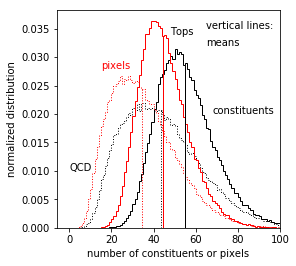

In [31]:
plt.figure(figsize=(4,4))

qn_c_mean = np.mean(qn_c)
tn_c_mean = np.mean(tn_c)
qn_s_mean = np.mean(qn_s)
tn_s_mean = np.mean(tn_s)

hist,bins,_ = plt.hist(qn_c,bins=range(0,120),label="#constituents (QCD)",histtype="step",
                       density=True,fill=False,color="black",ls=":")
plt.vlines(x=qn_c_mean,color="black",linestyles=":",lw=1,ymax=hist[np.argmax(bins > qn_c_mean)-1],ymin=0)
hist,bins,_ = plt.hist(tn_c,bins=range(0,120),label="#constituents (dark)",histtype="step",
                       density=True,fill=False,color="black")
plt.vlines(x=tn_c_mean,color="black",lw=1,ymax=hist[np.argmax(bins > tn_c_mean)-1],ymin=0)
hist,bins,_ = plt.hist(qn_s,bins=range(0,120),label="#pixels (QCD)",histtype="step",
                       density=True,fill=False,color="red",ls=":")
plt.vlines(x=qn_s_mean,color="red",linestyles=":",lw=1,ymax=hist[np.argmax(bins > qn_s_mean)-1],ymin=0)
hist,bins,_ = plt.hist(tn_s,bins=range(0,120),label="#pixels (dark)",histtype="step",
                       density=True,fill=False,color="red")
plt.vlines(x=tn_s_mean,color="red",lw=1,ymax=hist[np.argmax(bins > tn_s_mean)-1],ymin=0)

plt.xlim(xmax=100)

plt.xlabel("number of constituents or pixels")
plt.ylabel("normalized distribution")
#plt.text(-3,0.010,"QCD")
#plt.text(60,0.032,"Scalar")
#plt.text(0,0.042,"constituents")
#plt.text(0,0.039,"pixels",color="red")

#plt.text(65,0.042,"vertical lines:")
#plt.text(65,0.039,"means")

plt.text(65,0.035,"vertical lines:")
plt.text(65,0.032,"means")

plt.text(0,0.010,"QCD")
plt.text(48,0.034,"Tops")
plt.text(68,0.020,"constituents")
plt.text(15,0.028,"pixels",color="red")

#plt.savefig("scalar_n_hist_new.pdf", bbox_inches='tight')
plt.savefig("topsvsqcd_hist_constit_and_shih_new.pdf", bbox_inches='tight')

In [31]:
energs = ["img_{0}".format(i) for i in range(40*40)]
nn = 400
qn = []
tn = []

for i in range(nn):
    data = pd.read_hdf("h5files/tops-vs-qcd-img40-minpreproc-val.h5",key="table",start=i*1000,stop=(i+1)*1000)
    qcd = data.loc[data.is_signal_new == 0]
    top = data.loc[data.is_signal_new == 1]
    qn += list(np.sum(np.array(qcd[energs])!=0.,axis=1))
    tn += list(np.sum(np.array(top[energs])!=0.,axis=1))

In [19]:
plt.figure(figsize=(4,4))

plt.hist(qn,bins=range(0,103),label="QCD",histtype="step",
         density=True,fill=False,color="blue")
plt.hist(tn,bins=range(0,103),label="Top",histtype="step",
         density=True,fill=False,color="red")

plt.xlabel("number of constituents")
plt.ylabel("normalized distribution")
#plt.legend(loc="upper right")
plt.text(0,0.023,"QCD")
plt.text(55,0.02,"Top")

#plt.savefig("topsvsqcd_n_pixels_hist.pdf", bbox_inches='tight')

NameError: name 'qn' is not defined

<Figure size 288x288 with 0 Axes>

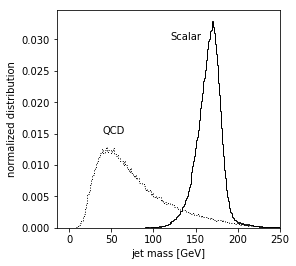

In [53]:
plt.figure(figsize=(4,4))

plt.hist(qm,bins=200,label="QCD",histtype="step",
         density=True,fill=False,color="black",ls=":")
plt.hist(tm,bins=200,label="Dark shower",histtype="step",
         density=True,fill=False,color="black")

plt.xlabel("jet mass [GeV]")
plt.ylabel("normalized distribution")
plt.xlim(xmax=250)
#plt.legend(loc="upper right")
plt.text(40,0.015,"QCD")
plt.text(120,0.03,"Scalar")

#plt.legend()
plt.savefig("scalar_mass_hist.pdf", bbox_inches='tight')

In [33]:
def calc_hist(cfile,ifile,start,stop,step):
    energs = ["E_%i"%i for i in range(0,200)]
    nn = (stop-start)//step
    n_con = []
    m_con = []

    for i in range(nn):
        df = pd.read_hdf(cfile,key="table",start=start+i*step,stop=start+(i+1)*step)
        n_con += list(np.sum(np.array(df[energs])!=0.,axis=1))

        df = pd.read_hdf(ifile,key="table",start=start+i*step,stop=start+(i+1)*step)
        m_con += list(df["mass"])

        print(i/nn)
    return n_con,m_con

In [34]:
n_qcd,m_qcd = calc_hist("../samples_for_gregor/dark-shower-final-constit-bg.h5",
                        "../samples_for_gregor/dark-shower-final-img40-bg.h5",
                        800000+260000,1200000,1000)
n_q200m10,m_q200m10 = calc_hist("../samples_for_gregor/dark-shower-final-constit-sig-Q200M10.h5",
                                "../samples_for_gregor/dark-shower-final-img40-sig-Q200M10.h5",
                                0,140000,1000)
#n_q200m20,m_q200m20 = calc_hist("../samples_for_gregor/dark-shower-final-constit-sig-Q200M20.h5",
#                                "../samples_for_gregor/dark-shower-final-img40-sig-Q200M20.h5",
#                                0,140000,1000)
n_q200m100,m_q200m100 = calc_hist("../samples_for_gregor/dark-shower-final-constit-sig-Q200M100.h5",
                                  "../samples_for_gregor/dark-shower-final-img40-sig-Q200M100.h5",
                                  0,140000,1000)
#n_q50m10,m_q50m10 = calc_hist("../samples_for_gregor/dark-shower-final-constit-sig-Q50M10.h5",
#                              "../samples_for_gregor/dark-shower-final-img40-sig-Q50M10.h5",
#                              0,140000,1000)

0.0
0.007142857142857143
0.014285714285714285
0.02142857142857143
0.02857142857142857
0.03571428571428571
0.04285714285714286
0.05
0.05714285714285714
0.06428571428571428
0.07142857142857142
0.07857142857142857
0.08571428571428572
0.09285714285714286
0.1
0.10714285714285714
0.11428571428571428
0.12142857142857143
0.12857142857142856
0.1357142857142857
0.14285714285714285
0.15
0.15714285714285714
0.16428571428571428
0.17142857142857143
0.17857142857142858
0.18571428571428572
0.19285714285714287
0.2
0.20714285714285716
0.21428571428571427
0.22142857142857142
0.22857142857142856
0.2357142857142857
0.24285714285714285
0.25
0.2571428571428571
0.2642857142857143
0.2714285714285714
0.2785714285714286
0.2857142857142857
0.29285714285714287
0.3
0.30714285714285716
0.3142857142857143
0.32142857142857145
0.32857142857142857
0.3357142857142857
0.34285714285714286
0.35
0.35714285714285715
0.36428571428571427
0.37142857142857144
0.37857142857142856
0.38571428571428573
0.39285714285714285
0.4
0.40714

In [35]:
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = ["black","green","red"]

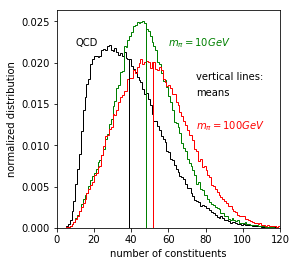

In [42]:
plt.figure(figsize=(4,4))

plt.xlabel("number of constituents")
plt.ylabel("normalized distribution")

ns = {
    "QCD" : n_qcd,
    "Q200M10" : n_q200m10,
    #"Q200M20" : n_q200m20,
    "Q200M100" : n_q200m100,
    #"Q50M10" : n_q50m10,
}

plt.xlim(xmax=120)

for i,(name,nc) in enumerate(ns.items()):
    #if name != "QCD":
    #    idx = name.index("M")
    #    qm = name[1:idx]
    #    mm = name[idx+1:]
    #    lbl = "$m_q = %s GeV$\n$m_m = %s GeV$"%(qm,mm)
    #    if name == "Q50M10":
    #        ls = ":"
    #    else:
    #        ls = "-"
    #else:
    #    lbl = "QCD"
    #    ls = "--"
    nc_mean = np.mean(nc)
    hist,bins,_ = plt.hist(nc,bins=range(0,150),histtype="step",density=True,fill=False,color=colors[i])
    plt.vlines(x=nc_mean,color=colors[i],lw=1,ymax=hist[np.argmax(bins > nc_mean)-1],ymin=0)


    
#leg = plt.legend(frameon=False)
#for color,text,hnd in zip(colors,leg.get_texts(),leg.legendHandles):
#    text.set_color(color)
#    hnd.set_visible(False)

x = -5
y = 0.002

plt.text(10,0.022,"QCD",color=colors[0])
#plt.text(80+x,0.022+y,"$m_q = 200 GeV$")
#plt.text(85+x,0.020+y,"$m_{\pi} =  10 GeV$",color=colors[1])
plt.text(65+x,0.020+y,"$m_{\pi} =  10 GeV$",color=colors[1])
#plt.text(85+x,0.018+y,"$m_{\pi} =  20 GeV$",color=colors[2])
#plt.text(85+x,0.016+y,"$m_{\pi} = 100 GeV$",color=colors[2])
plt.text(80+x,0.010+y,"$m_{\pi} = 100 GeV$",color=colors[2])
#plt.text(80+x,0.012+y,"$m_q = 50 GeV$")
#plt.text(85+x,0.010+y,"$m_{\pi} =  10 GeV$",color=colors[4])

plt.text(75,0.018,"vertical lines:")
plt.text(75,0.016,"means")

plt.savefig("dark_constit_hist_new.pdf", bbox_inches='tight')

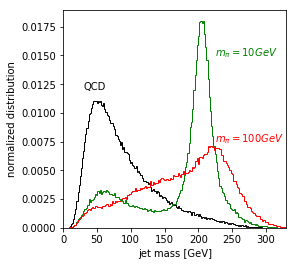

In [118]:
plt.figure(figsize=(4,4))

plt.xlabel("jet mass [GeV]")
plt.ylabel("normalized distribution")

ms = {
    "QCD" : m_qcd,
    "Q200M10" : m_q200m10,
    #"Q200M20" : m_q200m20,
    "Q200M100" : m_q200m100,
    #"Q50M10" : m_q50m10,
}

plt.xlim(xmax=330)

for i,(name,m) in enumerate(ms.items()):
    plt.hist(m,bins=200,label=name,histtype="step",density=True,fill=False,color=colors[i])
    
#plt.legend()

x1 = 210
y1 = 0.017
x2 = 80
y2 = 0.017

plt.text(30,0.012,"QCD",color=colors[0])
#plt.text(x1,y1,"$m_q = 200 GeV$")
#plt.text(x1+15,y1-0.0013,"$m_{\pi} =  10 GeV$",color=colors[1])
#plt.text(x1+15,y1-0.0026,"$m_{\pi} =  20 GeV$",color=colors[2])
#plt.text(x1+15,y1-0.0039,"$m_{\pi} = 100 GeV$",color=colors[3])
#plt.text(x2,y2,"$m_q = 50 GeV$")
#plt.text(x2+15,y2-0.0013,"$m_{\pi} =  10 GeV$",color=colors[4])

plt.text(225,0.015,"$m_{\pi} =  10 GeV$",color=colors[1])
plt.text(225,0.0075,"$m_{\pi} = 100 GeV$",color=colors[2])

plt.savefig("dark_mass_hist.pdf", bbox_inches='tight')